In [13]:
from matplotlib import pyplot as plt
import pandas as pd
from collections import defaultdict
import numpy as np
import os
import itertools

In [14]:
dataname = "emailEnron_10000"

In [15]:
def read_train(fname):
    acclist = []
    losslist = []
    eplist = []
    with open(fname, "r") as f:
        for line in f.readlines():
            tmp, acc_str = line.rstrip().split(" / ")
            acc = float(acc_str.split(" : ")[-1])
            
            ep_str, _, loss_str = tmp.split(": ")
            loss = float(loss_str.split(" (")[0])
            ep = int(ep_str.split(" ")[0])
            
            acclist.append(acc)
            losslist.append(loss)
            eplist.append(ep)
    return eplist, losslist, acclist

In [16]:
def plot_train_log(eplist, losslist, acclist, name):
    fig, axes = plt.subplots(dpi=100, figsize=(8,3), nrows=1, ncols=2)
    
    axes[0].plot(eplist, losslist, label="loss")
    axes[1].plot(eplist, acclist, label="acc")
    axes[0].set_title("Loss")
    axes[1].set_title("Acc")
    
    fig.subplots_adjust(wspace=0.3)
    fig.suptitle(name)
    
    plt.show()
    plt.close()

In [17]:
def read_test(fname):
    acclist = []
    preclist = []
    reclist = []
    f1list = []
    losslist = []
    eplist = []
    with open(fname, "r") as f:
        for line in f.readlines():
            eploss_str, acc_str, prec_str, rec_str, f1_str = line.rstrip().split("/")
            ep_str, loss_str = eploss_str.split(" epoch:Test Loss:")
            ep = int(ep_str)
            loss = float(loss_str.split(" (")[0])
            acc = float(acc_str.split(":")[-1])
            prec = float(prec_str.split(":")[-1])
            rec = float(rec_str.split(":")[-1])
            f1 = float(f1_str.split(":")[-1])
            
            acclist.append(acc)
            preclist.append(prec)
            reclist.append(rec)
            f1list.append(f1)
            losslist.append(loss)
            eplist.append(ep)
    return eplist, losslist, acclist, preclist, reclist, f1list

In [18]:
def plot_test_log(eplist, acclist, preclist, reclist, f1list, name):
    fig, axes = plt.subplots(dpi=100, figsize=(8,6), nrows=2, ncols=2)
    
    axes[0][0].plot(eplist, acclist, label="acc")
    axes[0][1].plot(eplist, f1list, label="f1")
    axes[1][0].plot(eplist, preclist)
    axes[1][1].plot(eplist, reclist)
    
    axes[0][0].set_title("Acc")
    axes[0][1].set_title("F1")
    axes[1][0].set_title("Precision")
    axes[1][1].set_title("Recall")
    
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    fig.suptitle(name)
    
    plt.show()
    plt.close()

In [21]:
# targetfname  = "log_test_macro.txt"
targetfname  = "log_train.txt"

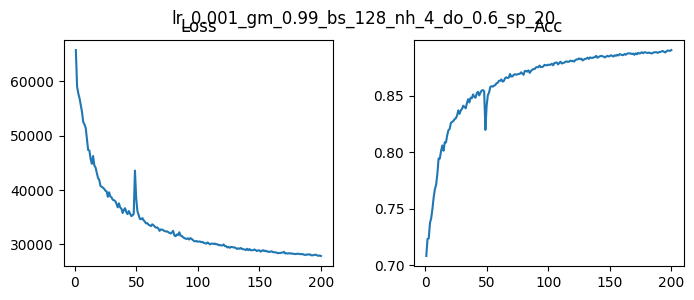

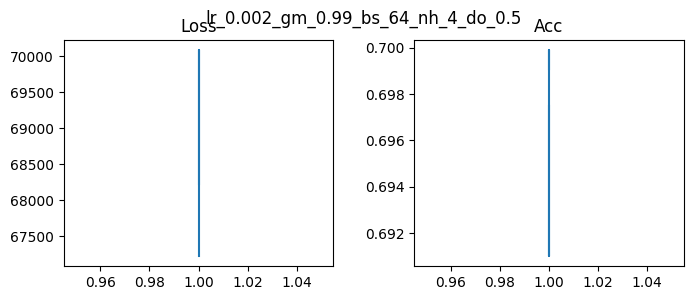

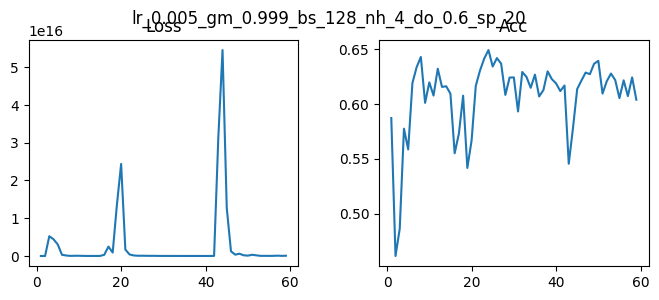

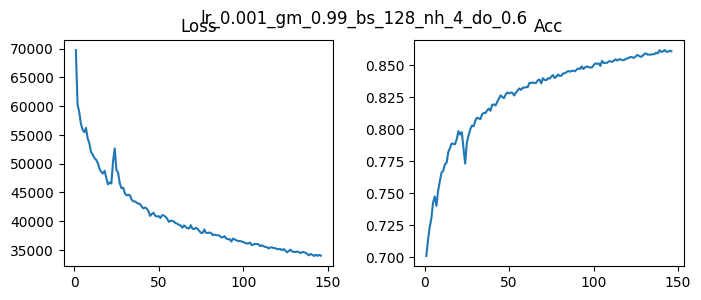

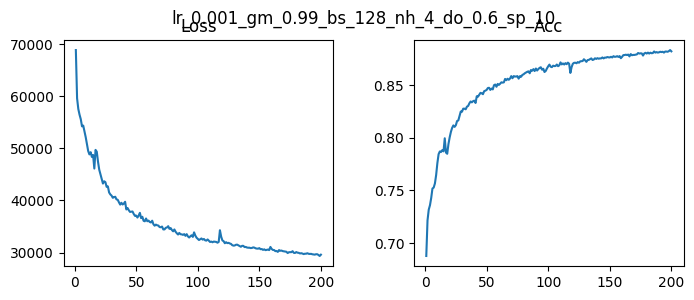

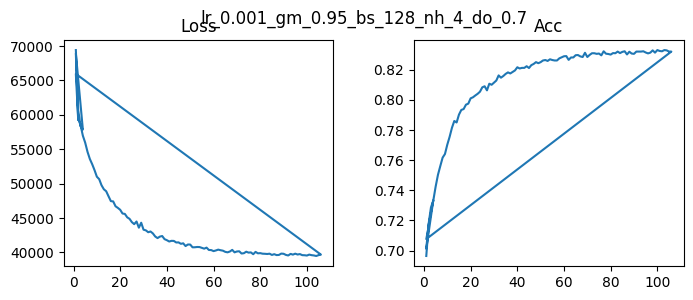

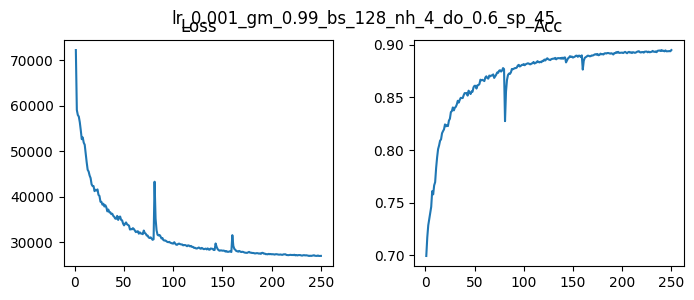

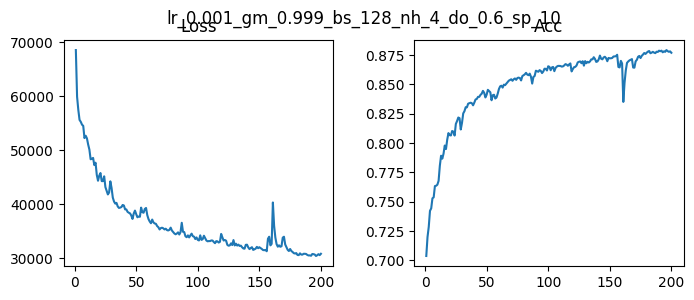

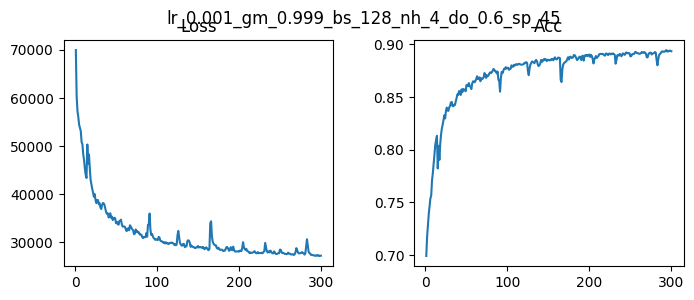

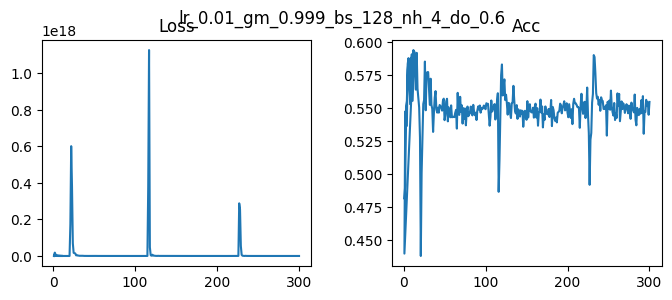

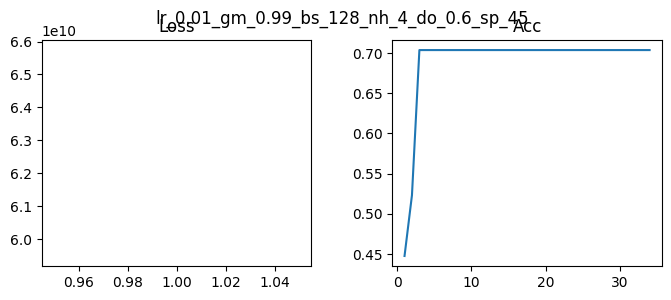

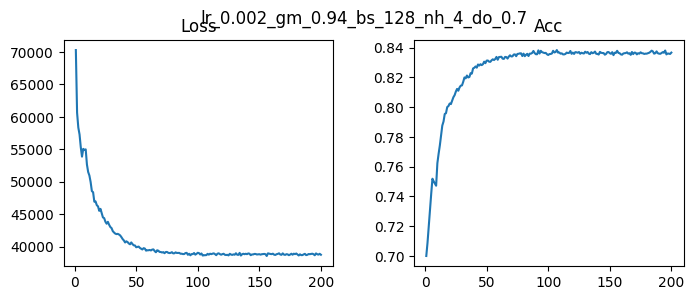

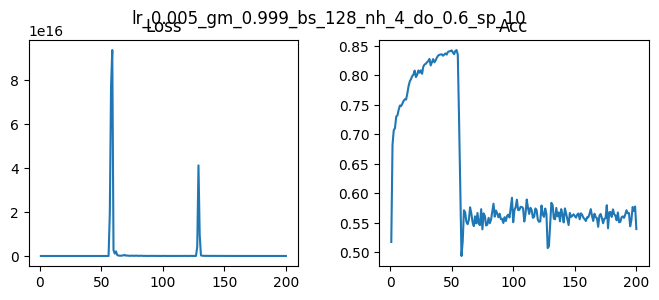

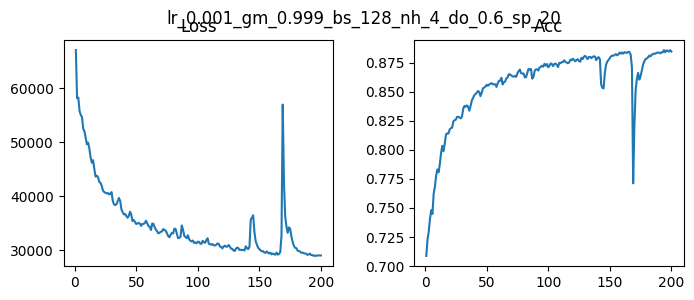

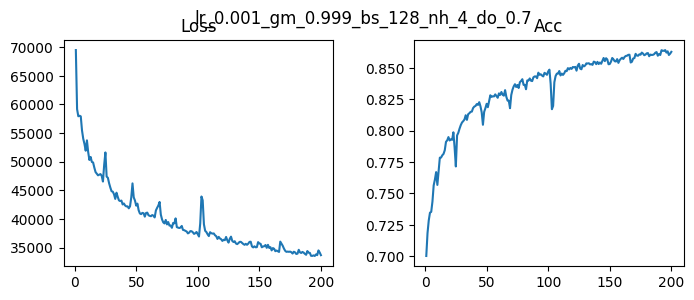

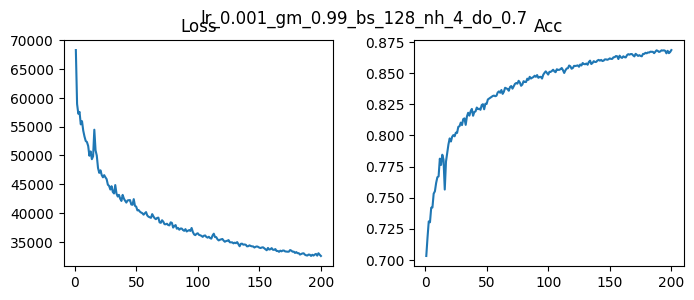

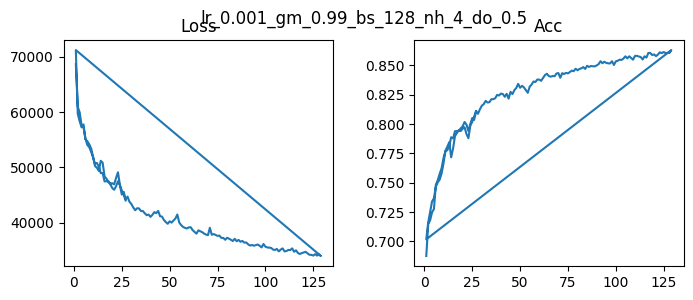

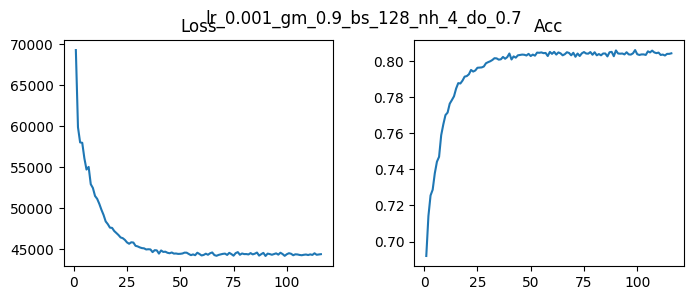

In [22]:
for initvec in ["onehot", "adj", "rw"]:
    orgdir = "../results/" + dataname + "/" + initvec + "/"
    if os.path.isdir(orgdir) is False:
        continue
    for modelname in os.listdir(orgdir):
        if modelname != "transformer-RankQ-AvgAgg_nl2_sm_snl1":
            continue
        modelnamedir = orgdir + modelname + "/"
        if os.path.isdir(modelnamedir) is False:
            continue
        param2f1macro = {}
        for paramname in os.listdir(modelnamedir):
            paramnamedir = modelnamedir + paramname + "/"
            if os.path.isfile(paramnamedir + targetfname):
                if "train" in targetfname:
                    eplist, losslist, acclist = read_train(paramnamedir + targetfname)
                    plot_train_log(eplist, losslist, acclist, paramname)
                else:
                    eplist, losslist, acclist, preclist, reclist, f1list = read_test(paramnamedir + targetfname)
                    plot_test_log(eplist, acclist, preclist, reclist, f1list, paramname)